## The goal
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Dataset

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import math

%matplotlib inline

In [536]:
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
# !wget $url

In [537]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [538]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [539]:
len(df)

9704

In [540]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

Text(0.5, 0, 'Miles per Gallon')

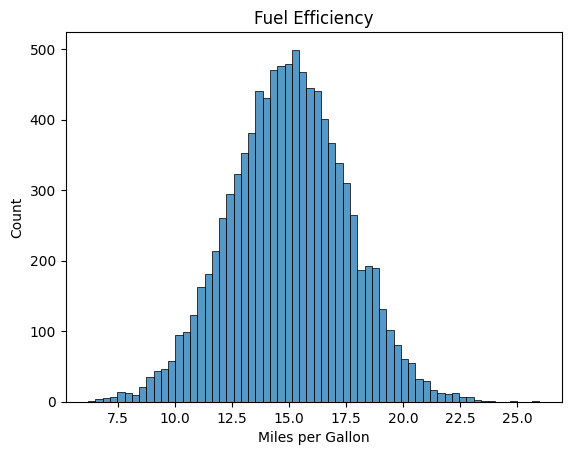

In [541]:
plot = sns.histplot(df["fuel_efficiency_mpg"])
plot.set_title("Fuel Efficiency")
plot.set_xlabel("Miles per Gallon")

#### Calculate skewness using the `skew` function.

In [542]:
skewness = df["fuel_efficiency_mpg"].skew()
skewness

np.float64(-0.012062219273507922)

The `skewness` value is < 0 that means there is a left long tail.

#### Calculate skewness using the `mean` and `median` functions

In [543]:
mean = df["fuel_efficiency_mpg"].mean()
median = df["fuel_efficiency_mpg"].median()

[mean, median, median - mean]

[np.float64(14.985243228208573),
 np.float64(15.006036963481211),
 np.float64(0.020793735272638614)]

The `median` value is more than the `mean` value that means there is a left long tail.

Since the `skewness` value is pretty small, we can say that there is no long tail in our dataset.

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [544]:
base_features = ["engine_displacement", "horsepower",
         "vehicle_weight", "model_year", "fuel_efficiency_mpg"]
base_features

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [545]:
df = df[base_features]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [546]:
is_null_columns = df.isnull().sum()
is_null_columns

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [547]:
is_null_columns[is_null_columns > 0].index[0]

'horsepower'

In [548]:
print(
    f"The column with the missing values is '{is_null_columns[is_null_columns > 0].index[0]}'")

The column with the missing values is 'horsepower'


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [549]:
print(f"The median for the 'horsepower' column is {df["horsepower"].median()}")

The median for the 'horsepower' column is 149.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [550]:
rng = np.random.default_rng(seed=42)
indices = rng.permutation(len(df))
indices

array([1425, 7185, 7477, ..., 4802, 5668, 5729], shape=(9704,))

In [551]:
train_items_count = int(len(df) * 0.6)
validation_items_count = int(len(df) * 0.2)
test_items_count = len(df) - train_items_count - validation_items_count

print(
    f"train counts: {train_items_count}, validate counts: {validation_items_count}, test counts: {test_items_count}")

train counts: 5822, validate counts: 1940, test counts: 1942


In [552]:
indices[:train_items_count]

array([1425, 7185, 7477, ..., 2301, 2930, 3224], shape=(5822,))

In [553]:
df_train = df.iloc[indices[:train_items_count]].copy()
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1425,190,135.0,3346.051384,2015,13.046346
7185,270,133.0,3360.818964,2001,13.064209
7477,210,95.0,3205.619985,2011,13.978858
7569,250,168.0,2428.658043,2011,17.960291
2481,160,162.0,3331.376582,2004,13.616607
...,...,...,...,...,...
1743,220,102.0,2843.124392,2018,15.304355
1799,180,133.0,2540.965832,2019,18.227340
2301,270,181.0,1925.667227,2011,20.158528
2930,120,177.0,2543.264869,2007,18.210303


In [554]:
indices[train_items_count:train_items_count + validation_items_count]

array([4819, 1557, 8179, ..., 1588, 3238, 3821], shape=(1940,))

In [555]:
df_validation = df.iloc[indices[train_items_count:train_items_count + validation_items_count]].copy()
df_validation

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
4819,230,161.0,3073.167035,2002,14.670715
1557,120,128.0,2894.629313,2016,15.283716
8179,190,152.0,3952.936516,2003,9.537177
9111,150,180.0,3178.656087,2002,14.325738
9381,190,102.0,3224.367698,2005,14.173315
...,...,...,...,...,...
9191,270,87.0,2357.702482,2004,17.611863
2523,180,159.0,3380.735446,2009,13.850521
1588,280,135.0,3784.764385,2023,11.449168
3238,120,189.0,3956.495364,2005,10.820563


In [556]:
df_test = df.iloc[indices[len(df) - test_items_count:]].copy()
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3107,220,NaN,3269.337602,2008,13.537869
5170,260,122.0,3082.996335,2022,13.442500
932,250,223.0,3273.182662,2013,13.103039
9157,140,180.0,2904.042056,2004,15.597640
5067,170,164.0,2631.464920,2001,16.272901
...,...,...,...,...,...
491,230,174.0,3980.215823,2002,10.643951
2189,180,143.0,2736.540450,2015,16.220643
4802,230,168.0,2574.688086,2016,16.953562
5668,170,162.0,3092.426902,2016,15.095843


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

#### Common functions

In [557]:
def get_X_y(df: DataFrame, y_column_name="fuel_efficiency_mpg"):
    y_result = df[y_column_name].values
    X_result = df.drop([y_column_name], axis=1).values

    return X_result, y_result

In [558]:
def create_copy_and_fill_with_value(df: DataFrame, value: float, column_name="horsepower"):
    result = df.copy(deep=True)
    result[column_name] = df[column_name].fillna(value)

    return result

In [559]:
def train_linear_regression(X, y):
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    result = XTX_inv.dot(XT).dot(y)
    return result

In [560]:
def calculate_weights(X, y):
    ones = np.ones(X.shape[0])
    X_extended = np.column_stack([ones, X])
    linear_regression_result = train_linear_regression(X_extended, y)

    w0 = linear_regression_result[0]
    weights = linear_regression_result[1:]

    return w0, weights


In [561]:
import matplotlib.pyplot as plt

def plot_feature_weights(weights, subtitle=""):
    """
    Plots a bar chart to visualize the impact of feature weights.

    Parameters:
    - weights (list or array): Corresponding weights for the features.
    - title (str): Title of the plot (default: "Impact of Each Weight on Fuel Efficiency (MPG)").
    """
    feature_names = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]
    title=f"Impact of Each Weight on Fuel Efficiency (MPG){subtitle}"

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, weights, color='skyblue')

    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Weights")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

#### Question 3.1. Fill missing values with 0.

In [562]:
df_train_with_zeros = create_copy_and_fill_with_value(df_train, value=0)

X_train_with_zeros, y_train_with_zeros = get_X_y(df_train_with_zeros)
[X_train_with_zeros, y_train_with_zeros]

[array([[ 190.        ,  135.        , 3346.05138399, 2015.        ],
        [ 270.        ,  133.        , 3360.81896419, 2001.        ],
        [ 210.        ,   95.        , 3205.61998489, 2011.        ],
        ...,
        [ 270.        ,  181.        , 1925.66722653, 2011.        ],
        [ 120.        ,  177.        , 2543.26486909, 2007.        ],
        [  90.        ,  161.        , 3218.01472816, 2013.        ]],
       shape=(5822, 4)),
 array([13.04634575, 13.06420894, 13.97885765, ..., 20.15852752,
        18.21030332, 14.6202358 ], shape=(5822,))]

In [563]:
df_validation_with_zeros = create_copy_and_fill_with_value(df_validation, value=0)
X_validation_with_zeros, y_validation_with_zeros = get_X_y(df_validation_with_zeros)

df_test_with_zeros = create_copy_and_fill_with_value(df_test, value=0)
X_test, y_test = get_X_y(df_test_with_zeros)

In [564]:
w0_for_zeros_as_na, weights_for_zeros_as_na = calculate_weights(X_train_with_zeros, y_train_with_zeros)
[w0_for_zeros_as_na, weights_for_zeros_as_na]

[np.float64(27.643082682589576),
 array([ 0.0003179 ,  0.00346772, -0.0050006 ,  0.00089868])]

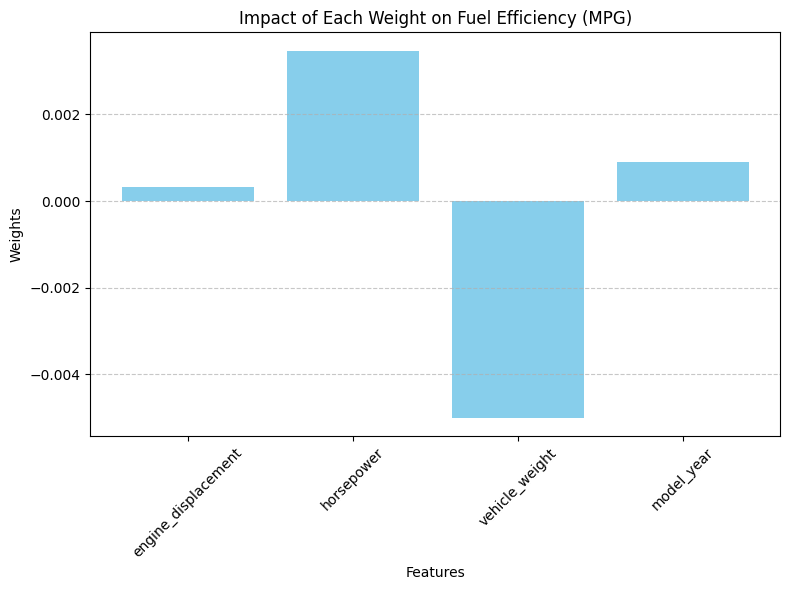

In [565]:
plot_feature_weights(weights_for_zeros_as_na)

#### Question 3.2. Fill missing values with the "mean".

In [566]:
mean = df_train["horsepower"].mean()
mean

np.float64(149.51681843523508)

In [567]:
df_train_with_mean = create_copy_and_fill_with_value(df_train, mean)
df_train_with_mean[df_train_with_mean["horsepower"] == mean].head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1470,190,149.516818,2712.715764,2002,16.562864
142,240,149.516818,2768.167545,2020,15.421866


In [568]:
X_train_mean, y_train_mean = get_X_y(df_train_with_mean)
[X_train_mean, y_train_mean]

[array([[ 190.        ,  135.        , 3346.05138399, 2015.        ],
        [ 270.        ,  133.        , 3360.81896419, 2001.        ],
        [ 210.        ,   95.        , 3205.61998489, 2011.        ],
        ...,
        [ 270.        ,  181.        , 1925.66722653, 2011.        ],
        [ 120.        ,  177.        , 2543.26486909, 2007.        ],
        [  90.        ,  161.        , 3218.01472816, 2013.        ]],
       shape=(5822, 4)),
 array([13.04634575, 13.06420894, 13.97885765, ..., 20.15852752,
        18.21030332, 14.6202358 ], shape=(5822,))]

In [569]:
w0_for_mean_as_na, weights_for_mean_as_na = calculate_weights(X_train_mean, y_train_mean)
[w0_for_mean_as_na, weights_for_mean_as_na.round(4)]

[np.float64(29.346391381043766), array([ 0.0003,  0.0101, -0.005 , -0.0004])]

In [570]:
df_validation_with_mean = create_copy_and_fill_with_value(df_validation, value=mean)
X_validation_with_mean, y_validation_with_mean = get_X_y(df_validation_with_mean)


df_test_with_mean = create_copy_and_fill_with_value(df_test, value=mean)
X_test_with_mean, y_test_with_mean = get_X_y(df_test_with_mean)

In [571]:
[w0_for_zeros_as_na, weights_for_zeros_as_na.round(4)]

[np.float64(27.643082682589576), array([ 0.0003,  0.0035, -0.005 ,  0.0009])]

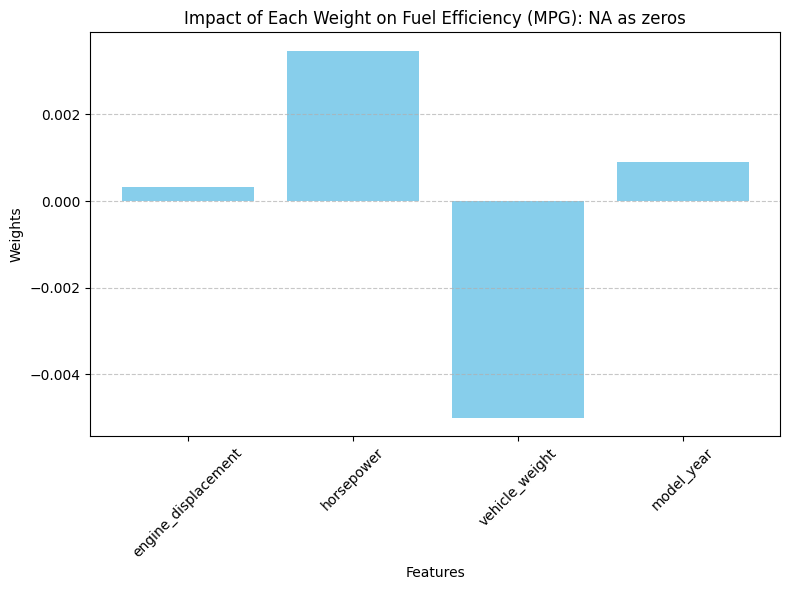

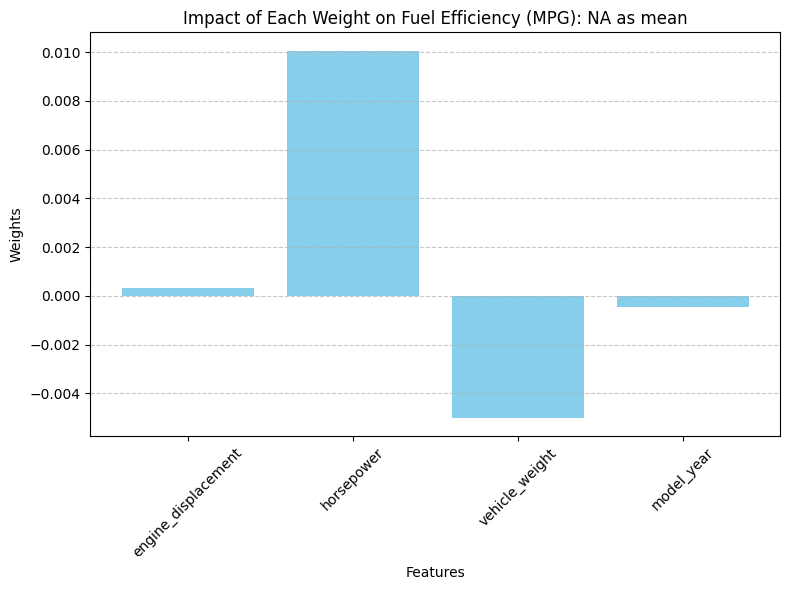

In [572]:
plot_feature_weights(weights_for_zeros_as_na, subtitle=": NA as zeros")
plot_feature_weights(weights_for_mean_as_na, subtitle=": NA as mean")


#### Lets analyze, how close our predictions are to the `training` dataset
Please see the quantification with the `validation` dataset below.

##### In case of replacing NA with zeros

In [573]:
def create_diagram(y_actual, y_pred, title):
    # Start a new diagram
    plt.figure(figsize=(15, 6))

    # Plot the histograms
    sns.histplot(y_actual, color="red",
                 alpha=0.5, label="Actual")
    sns.histplot(y_pred, color="cyan", alpha=0.5, label="Predicted")

    # Add a legend and title for clarity
    plt.legend()

    plt.title(title)

    # Show the plot
    plt.show()
    plt.close()

In [574]:
y_predict_with_zeros = w0_for_zeros_as_na + X_train_with_zeros.dot(weights_for_zeros_as_na)
y_predict_with_zeros

array([13.25019018, 13.1822588 , 13.81648645, ..., 20.53431962,
       17.38080796, 13.94702348], shape=(5822,))

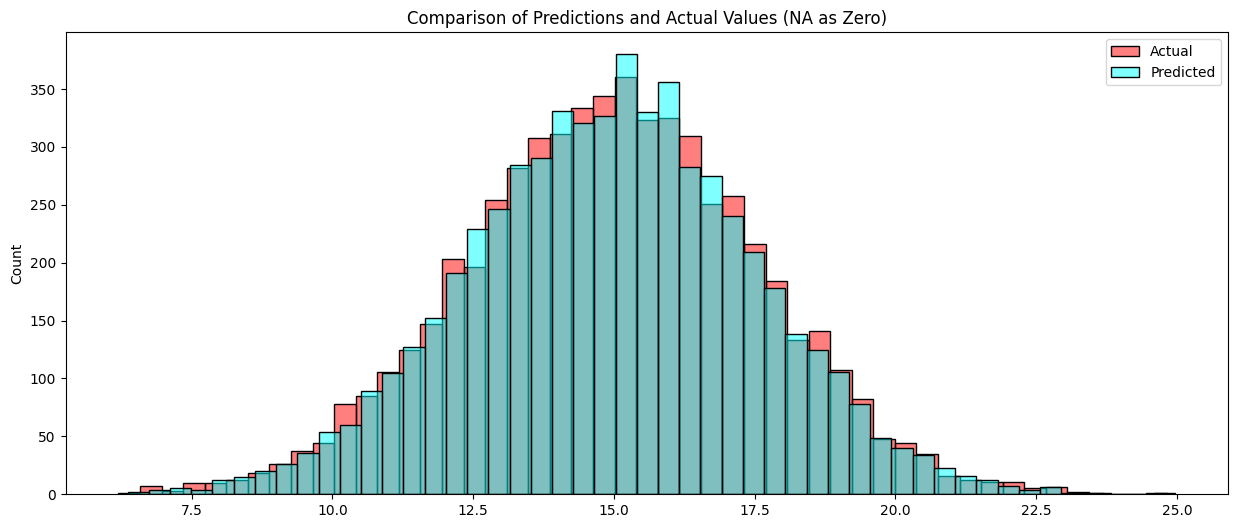

In [575]:
create_diagram(y_train_with_zeros, y_predict_with_zeros, "Comparison of Predictions and Actual Values (NA as Zero)")


##### In case of replacing NA with `mean`

In [576]:
y_predict_for_mean_as_na = w0_for_mean_as_na + X_train_mean.dot(weights_for_mean_as_na)
y_predict_for_mean_as_na

array([13.1080551 , 13.04553866, 13.41709708, ..., 20.71118437,
       17.53233095, 13.98005274], shape=(5822,))

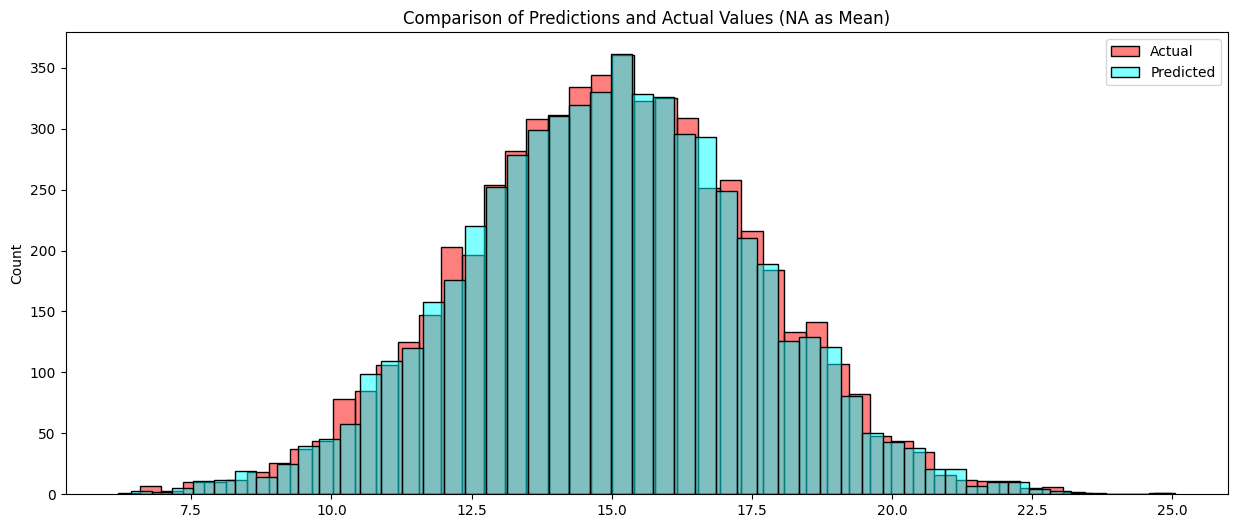

In [577]:
import matplotlib.pyplot as plt

title = "Comparison of Predictions and Actual Values (NA as Mean)"

create_diagram(y_train_mean, y_predict_for_mean_as_na, title)

#### Question 3.5. Use the validation dataset to evaluate the models and compare the RMSE of each option.

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$


In [578]:
def get_rmse(y_actual, y_prediction) -> float:
    sum_of_diffs = 0
    for i in range(len(y_actual)):
        sum_of_diffs += (y_actual[i] - y_prediction[i])**2

    result = math.sqrt(sum_of_diffs / len(y_actual))
    return result

##### In case of replacing NA with zeros

In [579]:
y_pred_validation_dataset_for_zeros_as_na = w0_for_zeros_as_na + X_validation_with_zeros.dot(weights_for_zeros_as_na)

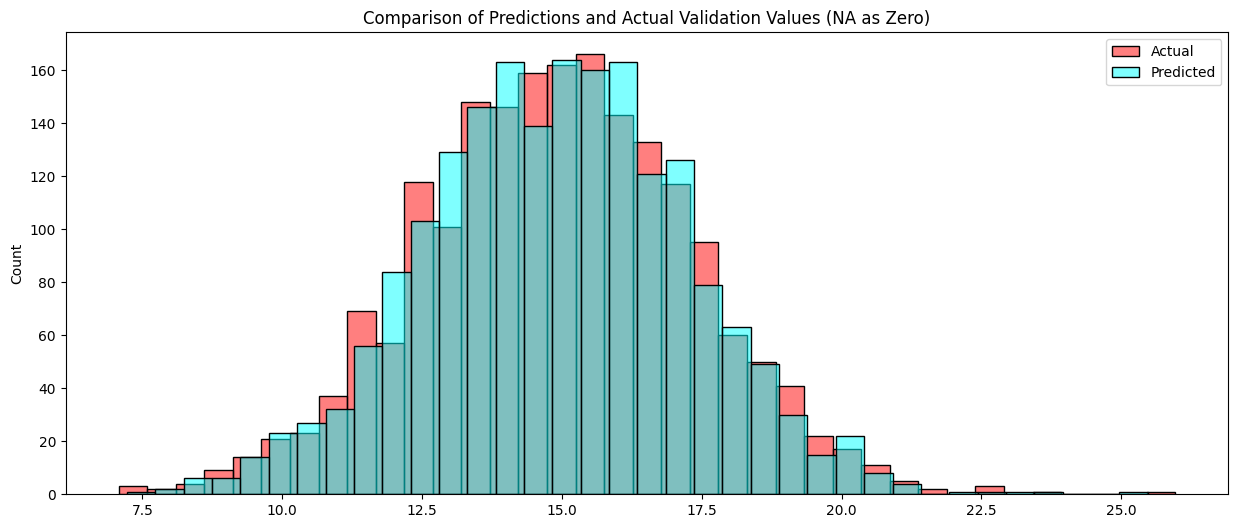

In [580]:
title = "Comparison of Predictions and Actual Validation Values (NA as Zero)"

create_diagram(y_validation_with_zeros, y_pred_validation_dataset_for_zeros_as_na, title)

In [581]:
rmse = get_rmse(y_validation_with_zeros, y_pred_validation_dataset_for_zeros_as_na)
print(f"The RMSE value in case of replacing NA values with zeros: {round(rmse, 2)} ({rmse})")

The RMSE value in case of replacing NA values with zeros: 0.52 (0.5216682478861032)


##### In case of replacing NA with `mean`

In [582]:
y_pred_validation_dataset_for_mean_as_na = w0_for_mean_as_na + X_validation_with_mean.dot(weights_for_mean_as_na)

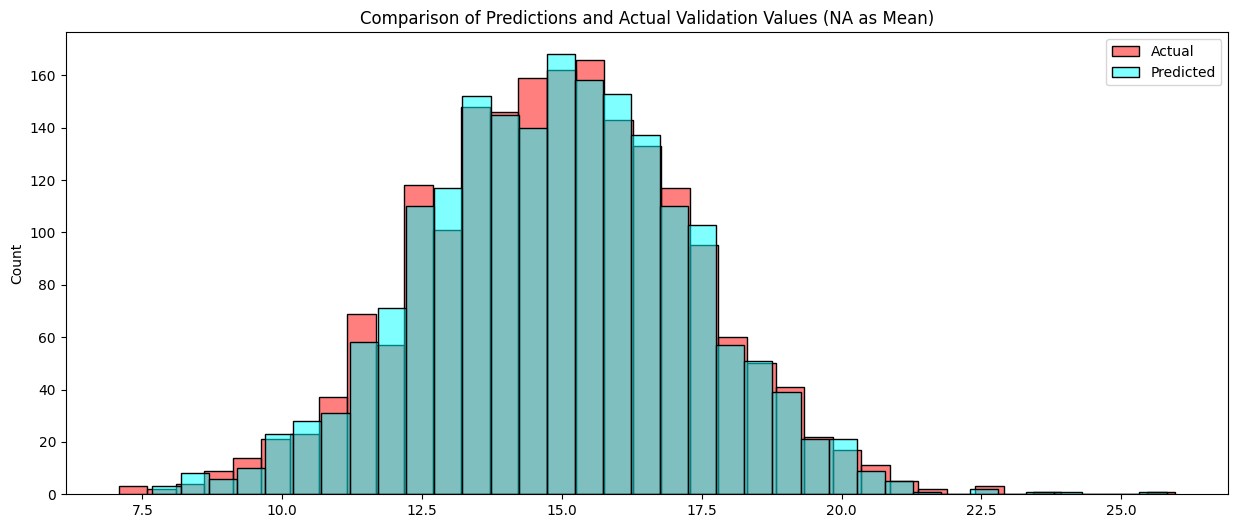

In [583]:
title = "Comparison of Predictions and Actual Validation Values (NA as Mean)"

create_diagram(y_validation_with_mean, y_pred_validation_dataset_for_mean_as_na, title)

In [584]:
rmse = get_rmse(y_validation_with_mean, y_pred_validation_dataset_for_mean_as_na)
print(f"The RMSE value in case of replacing NA values with mean: {round(rmse, 2)} ({rmse})")

The RMSE value in case of replacing NA values with mean: 0.47 (0.46652012986248304)


Let's use `sklearn` to calculate RMSE

In [585]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_validation_with_zeros, y_pred_validation_dataset_for_mean_as_na))

rmse, round(rmse, 2), rmse/100

(0.4665201298624829, 0.47, 0.00466520129862483)

##### Which option gives better RMSE?
    What happens when we impute missing values?

We have missing values ​​in a feature (for example, car weight).
We need to impute them so the model can learn.

    If we impute 0:
- This is an artificial, "unrealistic" value.
- It differs greatly from the real data unless the feature is close to zero.
- The model sees a distorted dataset, where some points are different from the rest.

This introduces noise → worse predictions → higher RMSE.

    If we impute the mean:
- This is a more "realistic" value that corresponds to the overall level of the feature.
- We preserve the statistical structure of the data.

The model is less confused because the imputed values ​​are not as outliers.

Errors become smaller → lower RMSE.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

##### Why do we need this?
We need this, because of the `Singular matrix` issue. See the example below.

In [586]:
X = [
  [1, 2, 2],
  [2, 1, 1],
  [3, 1, 1]
]

X = np.array(X)

In [587]:
# np.linalg.inv(X.T)

# The output is:
# raise LinAlgError("Singular matrix")
# LinAlgError: Singular matrix


##### How can we solve this?
We need to add a small value to the diagonal elements.

In [588]:
X = [
    [1.00000001, 2,          2],
    [2,          1.00000001, 1],
    [3,          1,          1.00000001]
]

X = np.array(X)

In [589]:
XT_inv = np.linalg.inv(X.T)
XT_inv

array([[-2.50000002e-01, -1.24999999e+07,  1.25000005e+07],
       [ 2.50000000e-01,  6.25000005e+07, -6.25000006e+07],
       [ 2.50000001e-01, -3.75000003e+07,  3.75000002e+07]])

In [590]:
np.linalg.inv(XT_inv).T

array([[1.00000005, 2.00000001, 2.00000001],
       [2.00000001, 1.00000001, 1.        ],
       [3.00000001, 1.        , 1.00000001]])

#### Implement a new function to calculate linear regression with regularization.

In [591]:
def train_linear_regression_with_regularization(X, y, r):
    XT = X.T
    XTX = XT.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)

    result = XTX_inv.dot(XT).dot(y)
    return result

def calculate_weights_with_regularization(X, y, r):
    if r < 0:
        raise ValueError("Regularization parameter r must be non-negative")

    ones = np.ones(X.shape[0])
    X_extended = np.column_stack([ones, X])
    linear_regression_result = train_linear_regression_with_regularization(X_extended, y, r)

    w0 = linear_regression_result[0]
    weights = linear_regression_result[1:]

    return w0, weights

In [592]:
regularization_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_values = []

for r in regularization_values:
    w0_regularization, weights_regularization = calculate_weights_with_regularization(X_train_with_zeros, y_train_with_zeros, r)

    # Calculate RMSE against validation dataset
    y_regularization = w0_regularization + X_validation_with_zeros.dot(weights_regularization)
    rmse_regularization = get_rmse(y_validation_with_zeros, y_regularization)

    rmse_values.append(rmse_regularization)

    print(r, w0_regularization, rmse_regularization, round(rmse_regularization, 2), weights_regularization)

0 27.643082682589576 0.5216682478861032 0.52 [ 0.0003179   0.00346772 -0.0050006   0.00089868]
0.01 23.888650913253777 0.5218249175080104 0.52 [ 0.00031787  0.00346888 -0.00499982  0.00276388]
0.1 10.749213613918934 0.5246686751073913 0.52 [ 0.00031776  0.00347295 -0.00499709  0.00929154]
1 1.6536585529782284 0.5287034955508778 0.53 [ 0.00031769  0.00347576 -0.0049952   0.0138102 ]
5 0.34736090900266553 0.5294194392088551 0.53 [ 0.00031768  0.00347617 -0.00499493  0.01445916]
10 0.17478217050805586 0.5295165658128753 0.53 [ 0.00031768  0.00347622 -0.00499489  0.0145449 ]
100 0.017584780532977275 0.5296056232256817 0.53 [ 0.00031768  0.00347625 -0.00499486  0.01462299]


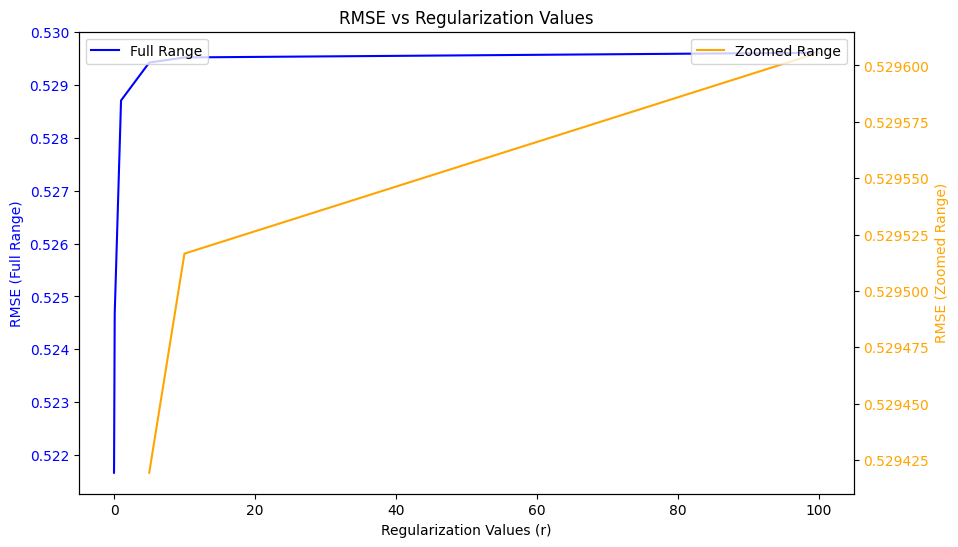

In [593]:
plt.figure(figsize=(10, 6))

# Plot the full range on the primary Y-axis
ax1 = sns.lineplot(x=regularization_values, y=rmse_values, label="Full Range", color="blue")
ax1.set_ylabel("RMSE (Full Range)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a secondary Y-axis
ax2 = ax1.twinx()
sns.lineplot(x=regularization_values[4:], y=rmse_values[4:], ax=ax2, label="Zoomed Range", color="orange")
ax2.set_ylabel("RMSE (Zoomed Range)", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Add labels and title
ax1.set_xlabel("Regularization Values (r)")
plt.title("RMSE vs Regularization Values")

# Add legends for both axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Display the plot
plt.show()

Which `r` gives the best RMSE?
The answer is: `0`

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> - If it's low, then all values are approximately the same.
> - If it's high, the values are different.
> - If standard deviation of scores is low, then our model is *stable*.

In [594]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [595]:
rmse_values = []

for seed in seed_values:
    rng = np.random.default_rng(seed=seed)
    indices = rng.permutation(len(df))

    df_train = df.iloc[indices[:train_items_count]]
    df_validation = df.iloc[indices[train_items_count:train_items_count + validation_items_count]]
    df_test = df.iloc[indices[len(df) - test_items_count:]]

    df_train = create_copy_and_fill_with_value(df_train, 0)
    df_validation = create_copy_and_fill_with_value(df_validation, 0)
    df_test = create_copy_and_fill_with_value(df_test, 0)

    print(f"Train size: {len(df_train)}, Validation size: {len(df_validation)}, Test size: {len(df_test)}")

    X_train, y_train = get_X_y(df_train)
    w0, weights = calculate_weights(X_train, y_train)

    X_validation, y_validation = get_X_y(df_validation)

    y_prediction = w0 + X_validation.dot(weights)

    rmse = np.sqrt(np.mean((y_validation - y_prediction) ** 2))
    rmse_values.append(rmse)

    print(f"seed: {seed}, rmse: {rmse}")


Train size: 5822, Validation size: 1940, Test size: 1942
seed: 0, rmse: 0.5210033268818324
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 1, rmse: 0.5243954303495827
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 2, rmse: 0.5251938709278183
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 3, rmse: 0.5243806735674427
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 4, rmse: 0.5259017805661702
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 5, rmse: 0.5252251126466737
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 6, rmse: 0.5204468326699387
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 7, rmse: 0.5103918743430199
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 8, rmse: 0.5203868283488267
Train size: 5822, Validation size: 1940, Test size: 1942
seed: 9, rmse: 0.5323005287957402


In [596]:
np.std(rmse_values)

np.float64(0.005336878722847535)

In [597]:
print(f"The standard deviation is: {round(np.std(rmse_values), 3)}")

The standard deviation is: 0.005
